In [20]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

print("Path to dataset files:", path)

data = pd.read_csv(path + "/student_depression_dataset.csv")

Path to dataset files: /home/nacho/.cache/kagglehub/datasets/adilshamim8/student-depression-dataset/versions/1


## Columnas dropeables

Dentro del estudio se omitirán algunos atributos del dataset que se estiman redundantes o poco útiles en principio. Estas serán:

- *id*: Es indexación redundante respecto al dataframe y no otorga información útil a los modelos de predicción.
- *job satisfaction*: No describe bien el dataset, ya que casi todos los valores son 0.
- *Degree*: Si bien la carrera cursada influye en la salud mental del individuo, lo hace mediante los hábitos de vida de la persona. Ya se tiene información de hábitos en el dataset y correlacionarlos con la carrera se escapa del scope del proyecto.
- *Profession*: Casi todas las instancias son 'student', así que consideraremos las instancias con este atributo y luego se dropea la columna.

In [111]:
# Primero vemos si hay datos nulos en el dataset
print("Nulos en el dataset:")
data.isna().sum()

Nulos en el dataset:


id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

Ninguna columna presenta valores nulos. Ahora verificamos estadísticamente para dropear las columnas.

### Job Satisfaction

In [112]:
data['Job Satisfaction'].value_counts()

Job Satisfaction
0.0    27893
2.0        3
4.0        2
1.0        2
3.0        1
Name: count, dtype: int64

Como se ve, casi todas las instancias tienen el mismo valor, la variable no es relevante o de utilidad.

In [113]:
data.drop(columns='Job Satisfaction', inplace=True)

### Profession

In [114]:
data['Profession'].value_counts()

Profession
Student                     27870
Architect                       8
Teacher                         6
'Digital Marketer'              3
Chef                            2
'Content Writer'                2
Pharmacist                      2
Doctor                          2
'UX/UI Designer'                1
'Civil Engineer'                1
Manager                         1
'Educational Consultant'        1
Lawyer                          1
Entrepreneur                    1
Name: count, dtype: int64

Buscamos analizar solo estudiantes, y al ser pocas las otras instancias con valores diferentes en este atributo, podemos eliminar estas instancias y luego al solo tener estudiantes podemos dropear la columna.

In [115]:
data = data[data['Profession'] == 'Student']
data.drop(columns='Profession', inplace=True)

### id y Degree

Por lo mencionado anteriormente solo dropeamos las columnas.

In [ ]:
data.drop(columns='id', inplace=True)
#data.drop(columns='Degree', inplace=True)

## Limpieza y preprocesamiento de datos

Ahora verificamos las instancias para los atributos restantes.

### Age

In [87]:
data['Age'].value_counts().sort_index()

Age
18.0    1587
19.0    1560
20.0    2237
21.0    1723
22.0    1159
23.0    1641
24.0    2255
25.0    1781
26.0    1154
27.0    1461
28.0    2129
29.0    1947
30.0    1145
31.0    1425
32.0    1258
33.0    1892
34.0    1467
35.0      10
36.0       7
37.0       2
38.0       8
39.0       3
41.0       1
42.0       4
43.0       2
44.0       1
46.0       2
48.0       3
49.0       1
51.0       1
54.0       1
56.0       1
58.0       1
59.0       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Ages $<= 34$ vs Ages $> 34$')

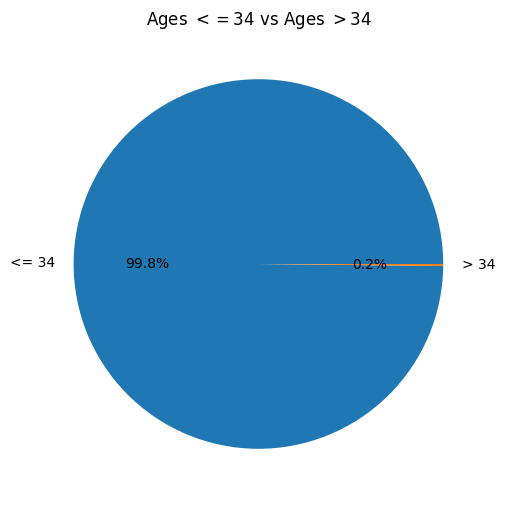

In [89]:
# pie chart representing ages <= 34 versus ages > 34
edades = [data['Age'].value_counts().sort_index().loc[18:34].sum(), data['Age'].value_counts().sort_index().loc[35:].sum()]
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(edades, labels=['<= 34', '> 34'], autopct='%1.1f%%')
ax.set_title('Ages $<= 34$ vs Ages $> 34$')

Hasta los 34 años hay una cantidad similar de registros. Mas allá de eso el dataset contiene menos de 10 datos por grupo etario, por lo que si se quiere estudiar la data por edad, habría que dejar fuera ese 0.2% de los datos.

In [90]:
data = data[data['Age'] <= 34]

### Financial Stress
Se encontraron tres instancias con este atributo en valor '?'. Se quitan estas instancias del dataframe.

In [118]:
data['Financial Stress'].value_counts()

Financial Stress
5.0    6704
4.0    5770
3.0    5219
1.0    5116
2.0    5058
Name: count, dtype: int64

In [117]:
data = data[data['Financial Stress'] != '?']

(0.0, 1.0)

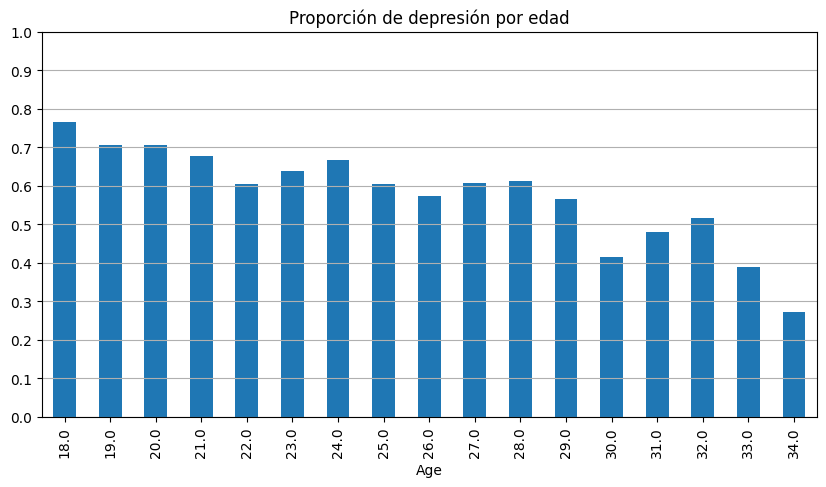

In [108]:
ax = data[data['Age'] <= 34].groupby('Age')['Depression'].mean().plot(kind='bar', figsize=(10, 5), title='Proporción de depresión por edad')
ax.grid(True, axis='y', which='major')
ax.set_yticks([i * 0.1 for i in range(11)])
ax.set_ylim(0, 1)

<Axes: title={'center': 'Porcentaje de depresión separado por presencia de ideación suicida'}, xlabel='ideacion'>

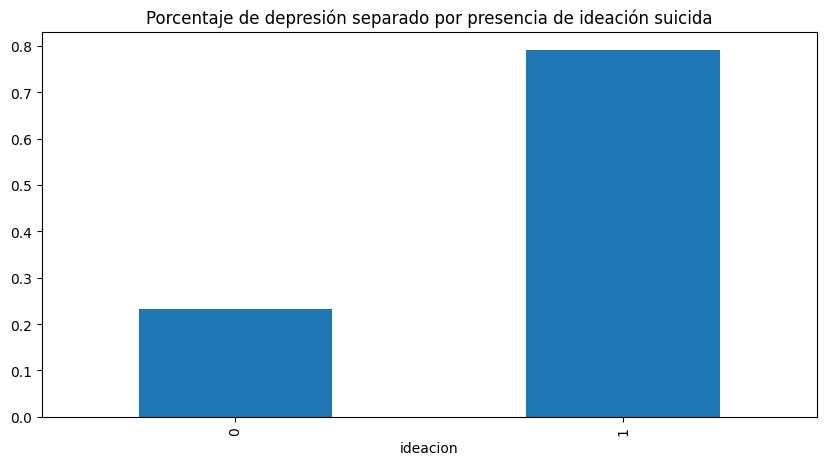

In [92]:
data['ideacion'] = data['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
data.groupby('ideacion')['Depression'].mean().plot(kind='bar', figsize=(10, 5), title='Porcentaje de depresión separado por presencia de ideación suicida')

<Axes: title={'center': 'Porcentaje de ideación por edad'}, xlabel='Age'>

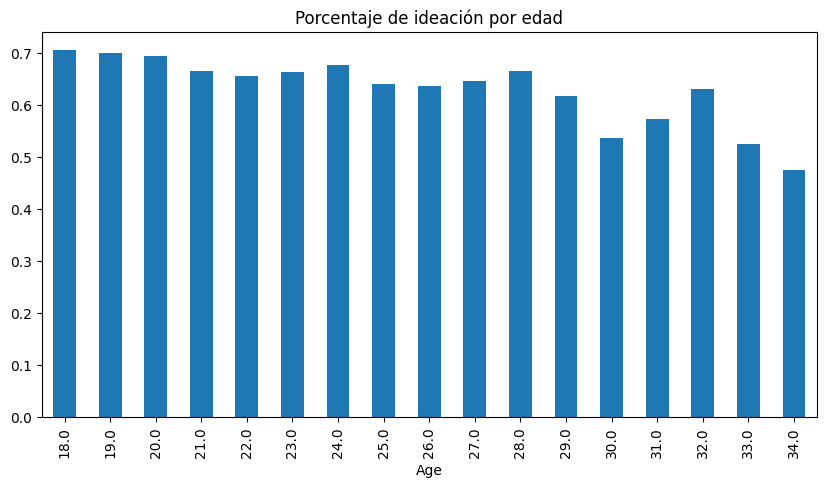

In [93]:
data[data['Age']<=34].groupby('Age')['ideacion'].mean().plot(kind='bar', figsize=(10, 5), title='Porcentaje de ideación por edad')

<Axes: title={'center': 'Porcentaje de ideación suicida separado por presencia de depresión'}, xlabel='Depression'>

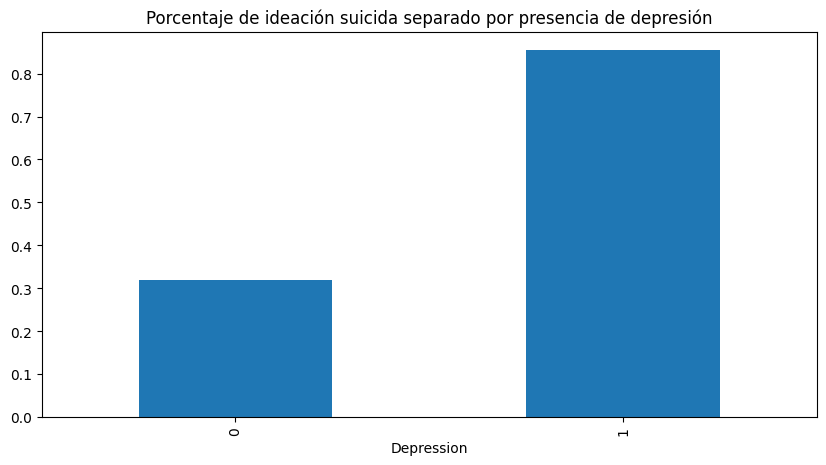

In [94]:
data.groupby('Depression')['ideacion'].mean().plot(kind='bar', figsize=(10, 5), title='Porcentaje de ideación suicida separado por presencia de depresión')

Existe un porcentaje relevante de muestras con ideación pero no depresión, por lo que ambas columnas son relevantes

In [95]:
data.mode()

,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,ideacion
0,Male,24.0,Kalyan,3.0,0.0,8.04,4.0,'Less than 5 hours',Unhealthy,Yes,10.0,5.0,No,1,1


In [96]:
data['Depression'].value_counts()

Depression
1    16295
0    11526
Name: count, dtype: int64

Text(0.5, 1.0, 'Porcentaje de depresión en la población estudiada')

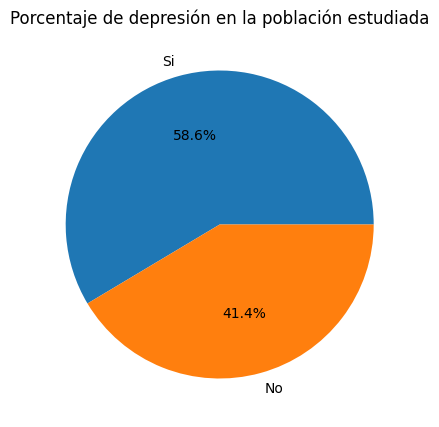

In [97]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.pie(data['Depression'].value_counts(), labels=['Si', 'No'], autopct='%1.1f%%')
ax.set_title('Porcentaje de depresión en la población estudiada')

In [98]:
data.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'ideacion'],
      dtype='object')

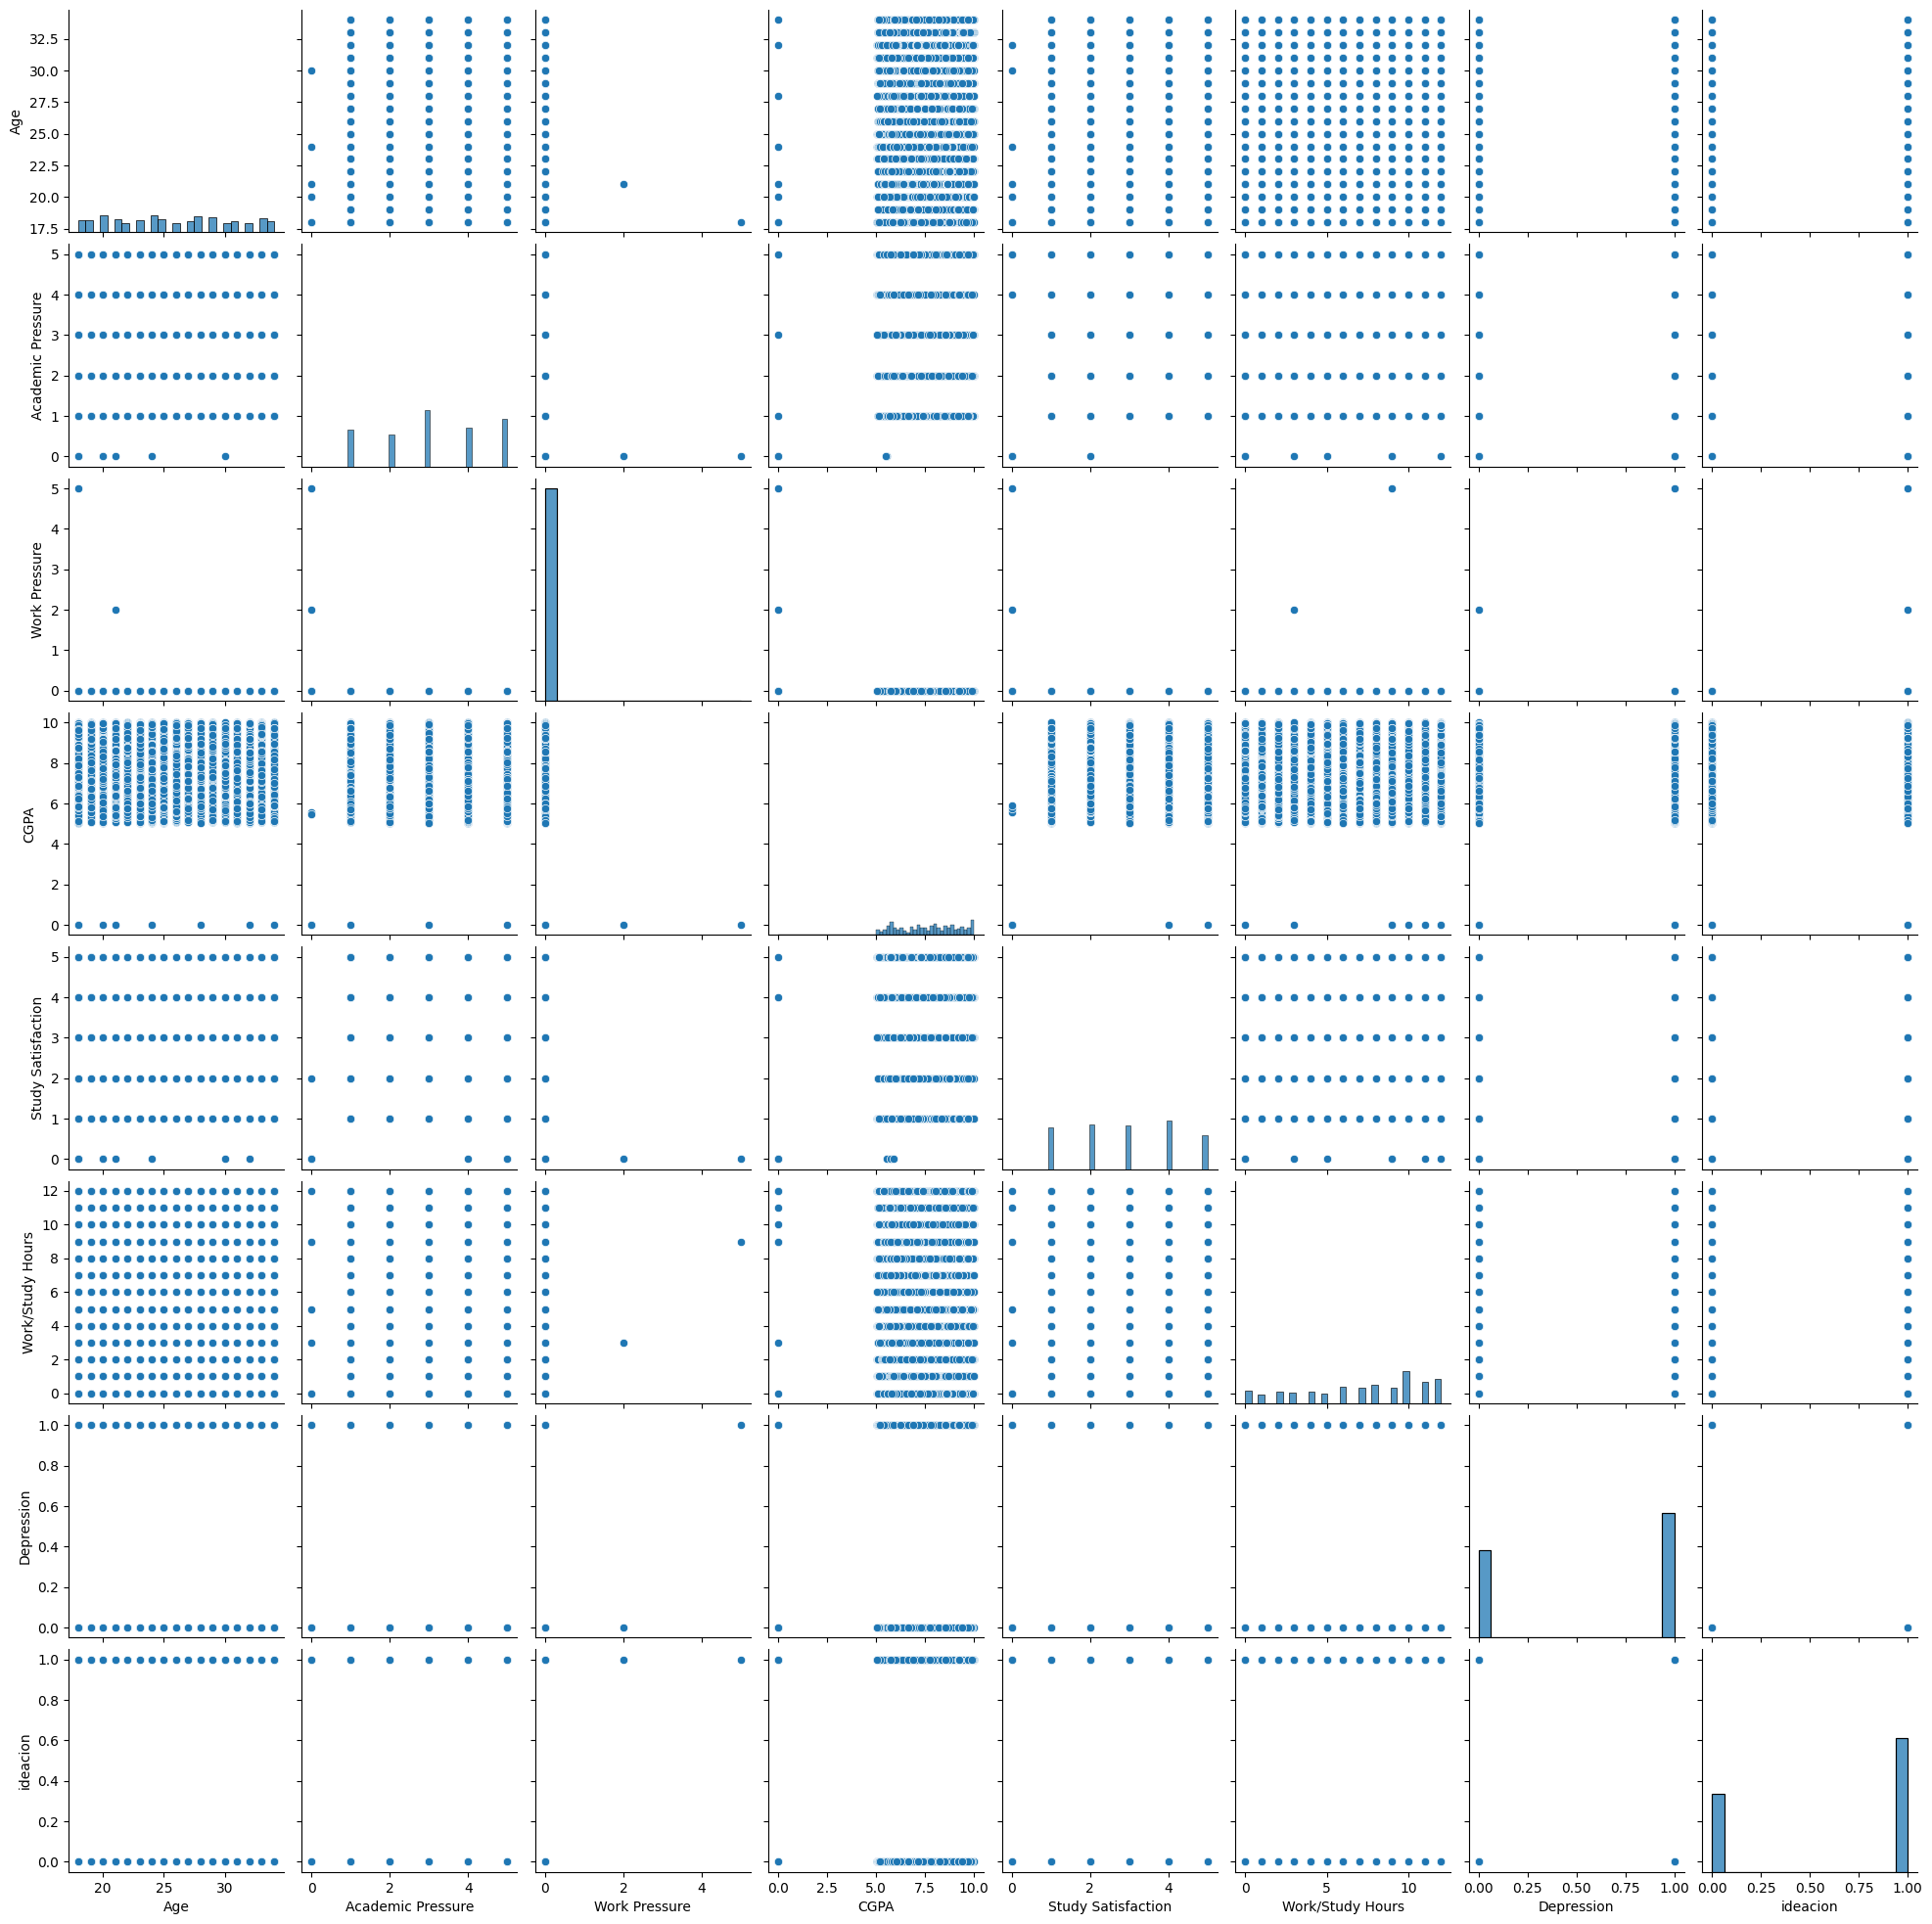

In [99]:
numerical_columns = data.select_dtypes(include=['number'])
sns.pairplot(numerical_columns)

## GPA respecto a la label

<Axes: >

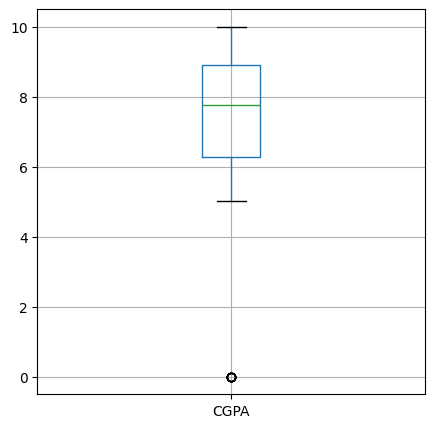

In [100]:
data.boxplot(column='CGPA',figsize=(5, 5))

Text(0.5, 1.0, 'Histograma de CGPA')

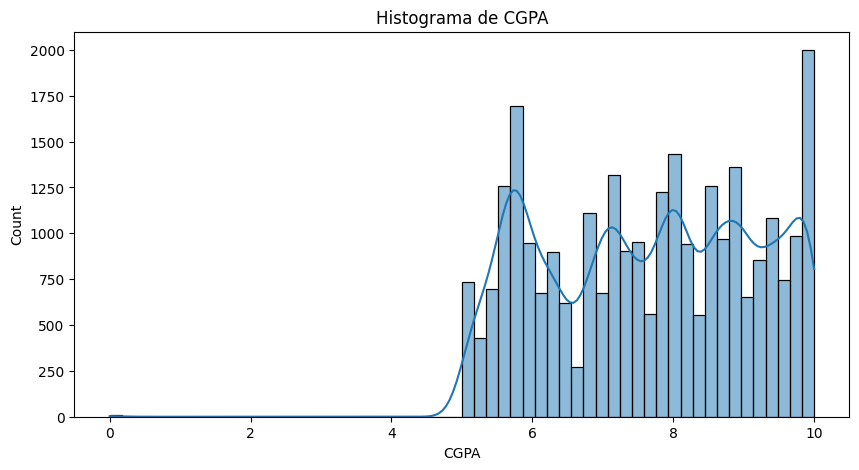

In [101]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(data[['CGPA']])

# sns.histplot(kde.sample(1_000_000))
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data['CGPA'], kde=True, ax=ax)
ax.set_title('Histograma de CGPA')

/tmp/ipykernel_2413/1592243539.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.groupby('Depression').boxplot(column='CGPA', ax=ax)


Text(0.5, 0.98, 'Boxplot de CGPA por presencia de depresión')

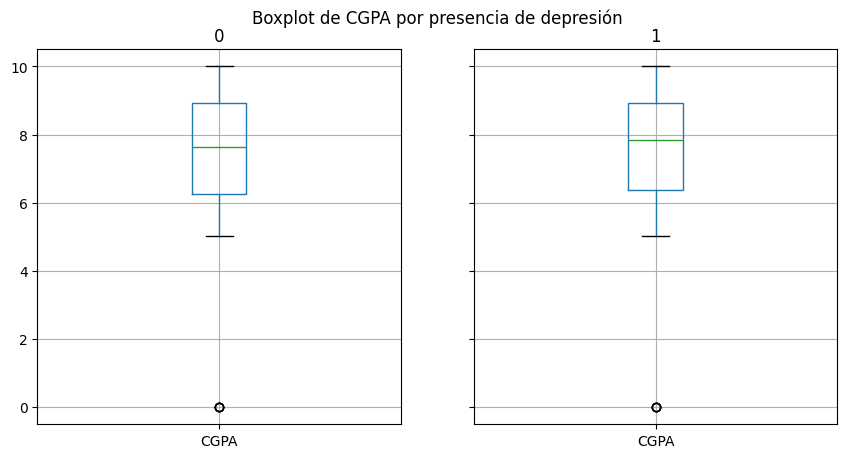

In [102]:
fig, ax = plt.subplots(figsize=(10, 5))
data.groupby('Depression').boxplot(column='CGPA', ax=ax)
fig.suptitle('Boxplot de CGPA por presencia de depresión')

Text(0.5, 1.0, 'Matriz de confusión entre depresión e ideación suicida')

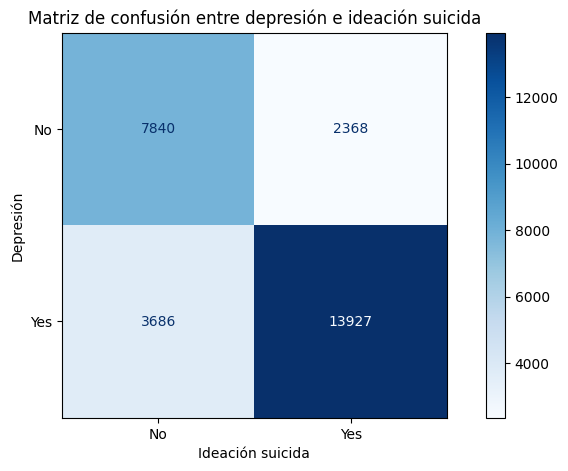

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
d = {'Yes': 1, 'No': 0}
fig, ax = plt.subplots(figsize=(10, 5))
matrix = confusion_matrix(data['Have you ever had suicidal thoughts ?'].map(d), data['Depression'])
display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['No', 'Yes'])
display.plot(cmap='Blues', ax=ax)
ax.set_ylabel('Depresión')
ax.set_xlabel('Ideación suicida')
ax.set_title('Matriz de confusión entre depresión e ideación suicida')